# Customer Conversion Prediction

### Problem Statement

You are working for a new-age insurance company and employ mutiple outreach plans to sell term insurance to your customers. 
Telephonic marketing campaigns still remain one of the most effective way to reach out to people however they incur a lot of
cost. Hence, it is important to identify the customers that are most likely to convert beforehand so that they can be 
specifically targeted via call. We are given the historical marketing data of the insurance company and are required to build 
a ML model that will predict if a client will subscribe to the insurance.

### Features:

- age (numeric) 

- job : type of job

- marital : marital status

- educational_qual : education status

- call_type : contact communication type

- day: last contact day of the month (numeric)

- mon: last contact month of year

- dur: last contact duration, in seconds (numeric)

- num_calls: number of contacts performed during this campaign and for this client

- prev_outcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

- Output variable (desired target):

y - has the client subscribed to the insurance?


###############################################################################################################################


## Basic Analysis of Dataset from Problem Statement and Features

- It is a supervised learning problem - We are predicting target variable
- From target varible we can clearly understand it is a classification problem
- From target variable we can tell it is a binary classification problem.



In [1]:
import pandas as pd
import numpy as np
import warnings
from sklearn.exceptions import ConvergenceWarning
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

# reading the csv file and checking what are all the columns in the dataset

df = pd.read_csv("E:/downloads/train.csv")
pd.set_option('display.max_columns',None)
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


## Shape

In [3]:

# let's check the shape of the dataset

print(f'In this dataset total rows = {df.shape[0]} and total columns = {df.shape[1]}')

In this dataset total rows = 45211 and total columns = 11


# DATA CLEANING

## Missing values

In [4]:

# let's check whether there is any missing values present in the dataset
# here itself let's check the dtypes of the columns

warnings.simplefilter(action='ignore',category=FutureWarning)

col_info = pd.DataFrame(df.dtypes).T.rename(index = {0:'Column Types'})

col_info = col_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index = {0:'Null Values'}))

col_info = col_info.append(pd.DataFrame((df.isnull().sum())/len(df)).T.rename(index = {0:'Null Values (%)'}))
col_info

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
Column Types,int64,object,object,object,object,int64,object,int64,int64,object,object
Null Values,0,0,0,0,0,0,0,0,0,0,0
Null Values (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:

num_var = df[['age', 'day', 'dur', 'num_calls']]
cat_var = df[['job', 'marital', 'education_qual', 'call_type', 'mon', 'prev_outcome']]

## Duplicates

In [6]:

# now let's check is there is any dublicates 

df.duplicated().sum()

6

In [7]:

# let's drop the dublicates from the datasets

df = df.drop_duplicates()
df.duplicated().sum()

0

In [8]:

# let's check the count of dtypes

pd.DataFrame(df.dtypes.value_counts()).T

,object,int64
0,7,4


## Misspelled word

In [9]:

print("UNIQUE CATEGORIES OF COLUMN ---> JOB \n")
print(df['job'].unique())

UNIQUE CATEGORIES OF COLUMN ---> JOB 

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']


In [10]:

print("UNIQUE CATEGORIES OF COLUMN ---> MARITAL STATUS \n")
print(df['marital'].unique())

UNIQUE CATEGORIES OF COLUMN ---> MARITAL STATUS 

['married' 'single' 'divorced']


In [11]:

print("UNIQUE CATEGORIES OF COLUMN ---> EDUCATION QUALIFICATION \n")
print(df['education_qual'].unique())

UNIQUE CATEGORIES OF COLUMN ---> EDUCATION QUALIFICATION 

['tertiary' 'secondary' 'unknown' 'primary']


In [12]:

print("UNIQUE CATEGORIES OF COLUMN ---> CALL TYPE \n")
print(df['call_type'].unique())

UNIQUE CATEGORIES OF COLUMN ---> CALL TYPE 

['unknown' 'cellular' 'telephone']


In [13]:

print("UNIQUE CATEGORIES OF COLUMN ---> MONTH \n")
print(df['mon'].unique())

UNIQUE CATEGORIES OF COLUMN ---> MONTH 

['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']


In [14]:

print("UNIQUE CATEGORIES OF COLUMN ---> PREVIOUS OUTCOME \n")
print(df['prev_outcome'].unique())

UNIQUE CATEGORIES OF COLUMN ---> PREVIOUS OUTCOME 

['unknown' 'failure' 'other' 'success']


In [15]:

print("UNIQUE CATEGORIES OF COLUMN ---> TARGET VARIABLE y \n")
print(df['y'].value_counts())

UNIQUE CATEGORIES OF COLUMN ---> TARGET VARIABLE y 

no     39916
yes     5289
Name: y, dtype: int64


In [16]:

print("percentage of no : ","{:.2f}".format(39916/(39916+5289)*100),'%')
print("percentage of yes : ","{:.2f}".format(5289/(39916+5289)*100),'%')

percentage of no :  88.30 %
percentage of yes :  11.70 %


In [17]:

# let's change the categorical value to numerical for target data

df['target'] = df['y'].map({'yes':1,'no':0})
del df['y']

In [18]:

df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,target
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,0
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,0
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,0


In [19]:

df.describe()

,age,day,dur,num_calls,target
count,45205.000000,45205.00000,45205.000000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898,0.117000
std,10.619130,8.32234,257.538504,3.098189,0.321424
min,18.000000,1.00000,0.000000,1.000000,0.000000
25%,33.000000,8.00000,103.000000,1.000000,0.000000
50%,39.000000,16.00000,180.000000,2.000000,0.000000
75%,48.000000,21.00000,319.000000,3.000000,0.000000
max,95.000000,31.00000,4918.000000,63.000000,1.000000


## Outliers

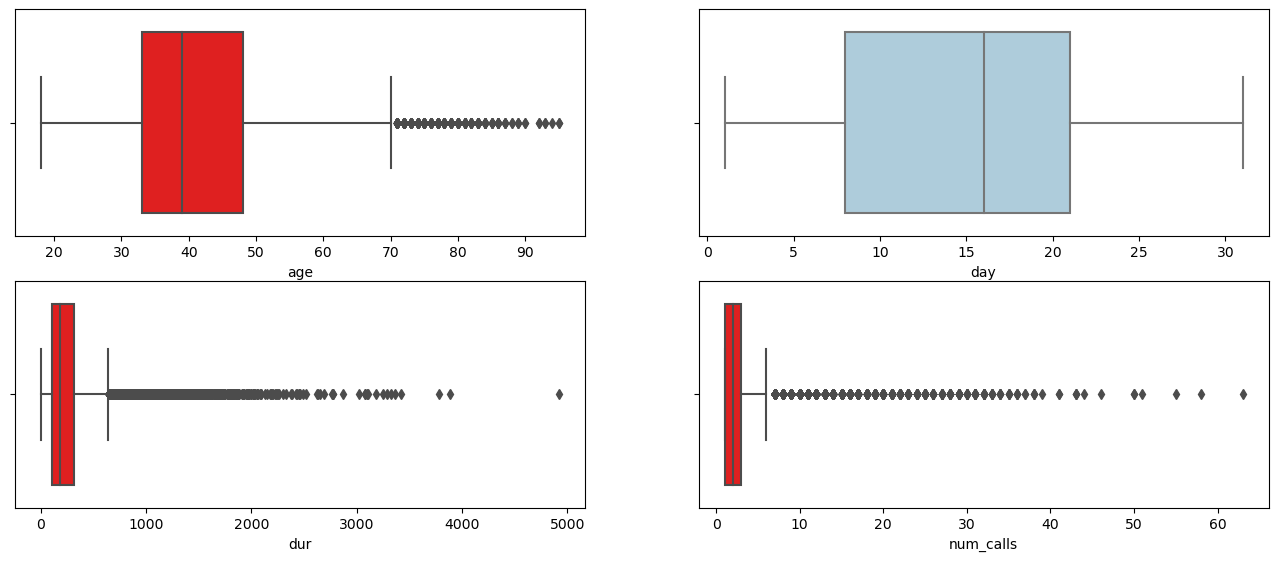

<Figure size 640x480 with 0 Axes>

In [20]:

# outliers detection and clip/strip

plt.figure(figsize=(25,10))
plt.subplot(331)
sns.boxplot(df['age'], color='red')

plt.subplot(332)
sns.boxplot(df['day'], palette='Paired')

plt.subplot(334)
sns.boxplot(df['dur'], color='red')

plt.subplot(335)
sns.boxplot(df['num_calls'], color='red')

plt.show()
plt.tight_layout()

In [21]:

# here it seems except day all three numerical datas having outliers
outliers = []
q1,q3 = np.percentile(df['age'],[25,75])
iqr = q3-q1
ul = q3 + 1.5*iqr                              # setting upper limit
ll = q1 - 1.5*iqr                              # setting lower limit
for i in df['age']:
    if i>ul or i<ll:
        outliers.append(i)
print(f'lower_limit = {ll} and upper_limit = {ul}')
print(f'Total outliers in the column age is ----> {len(outliers)} \n')

outliers = []
q1,q3 = np.percentile(df['dur'],[25,75])
iqr = q3-q1
ul = q3 + 1.5*iqr                              # setting upper limit
ll = q1 - 1.5*iqr                              # setting lower limit
for i in df['dur']:
    if i>ul or i<ll:
        outliers.append(i)
print(f'lower_limit = {ll} and upper_limit = {ul}')
print(f'Total outliers in the column dur is ----> {len(outliers)} \n')

outliers = []
q1,q3 = np.percentile(df['num_calls'],[25,75])
iqr = q3-q1
ul = q3 + 1.5*iqr                              # setting upper limit
ll = q1 - 1.5*iqr                              # setting lower limit
for i in df['num_calls']:
    if i>ul or i<ll:
        outliers.append(i)
print(f'lower_limit = {ll} and upper_limit = {ul}') 
print(f'Total outliers in the column num_calls is ----> {len(outliers)} \n')

outliers = []
q1,q3 = np.percentile(df['day'],[25,75])
iqr = q3-q1
ul = q3 + 1.5*iqr                              # setting upper limit
ll = q1 - 1.5*iqr                              # setting lower limit
for i in df['day']:
    if i>ul or i<ll:
        outliers.append(i)
print(f'Total outliers in the column day is ----> {len(outliers)} \n')

lower_limit = 10.5 and upper_limit = 70.5
Total outliers in the column age is ----> 487 

lower_limit = -221.0 and upper_limit = 643.0
Total outliers in the column dur is ----> 3235 

lower_limit = -2.0 and upper_limit = 6.0
Total outliers in the column num_calls is ----> 3064 

Total outliers in the column day is ----> 0 



In [22]:

#removing outlier for age column
# Clip/ Strip is used to detuct value to lower & upper threshold.
df.age = df.age.clip(10.5,70.5)

#removing outlier for dur column
df.dur = df.dur.clip(-221,643)

#removing outlier for num_calls column
df.num_calls = df.num_calls.clip(-2.0,6.0)

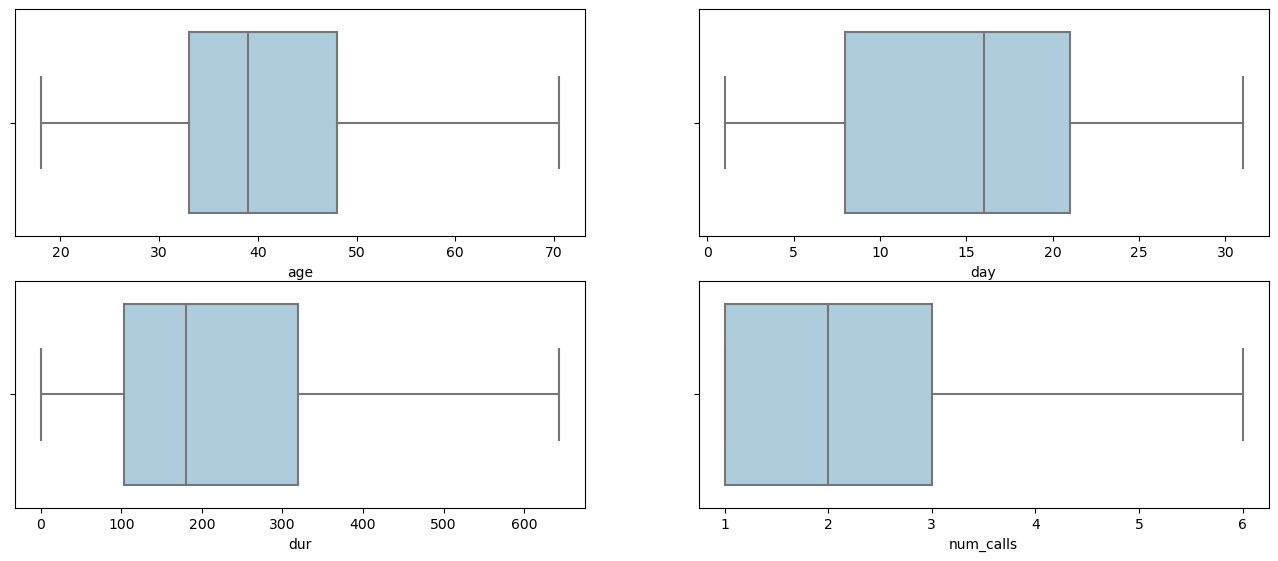

<Figure size 640x480 with 0 Axes>

In [23]:

# After deletion of outliers

plt.figure(figsize=(25,10))
plt.subplot(331)
sns.boxplot(df['age'], palette='Paired')

plt.subplot(332)
sns.boxplot(df['day'], palette='Paired')

plt.subplot(334)
sns.boxplot(df['dur'], palette='Paired')

plt.subplot(335)
sns.boxplot(df['num_calls'], palette='Paired')

plt.show()
plt.tight_layout()

# EDA

## Distribution Of Catergorical Features

In [24]:

cat_var.columns

Index(['job', 'marital', 'education_qual', 'call_type', 'mon', 'prev_outcome'], dtype='object')

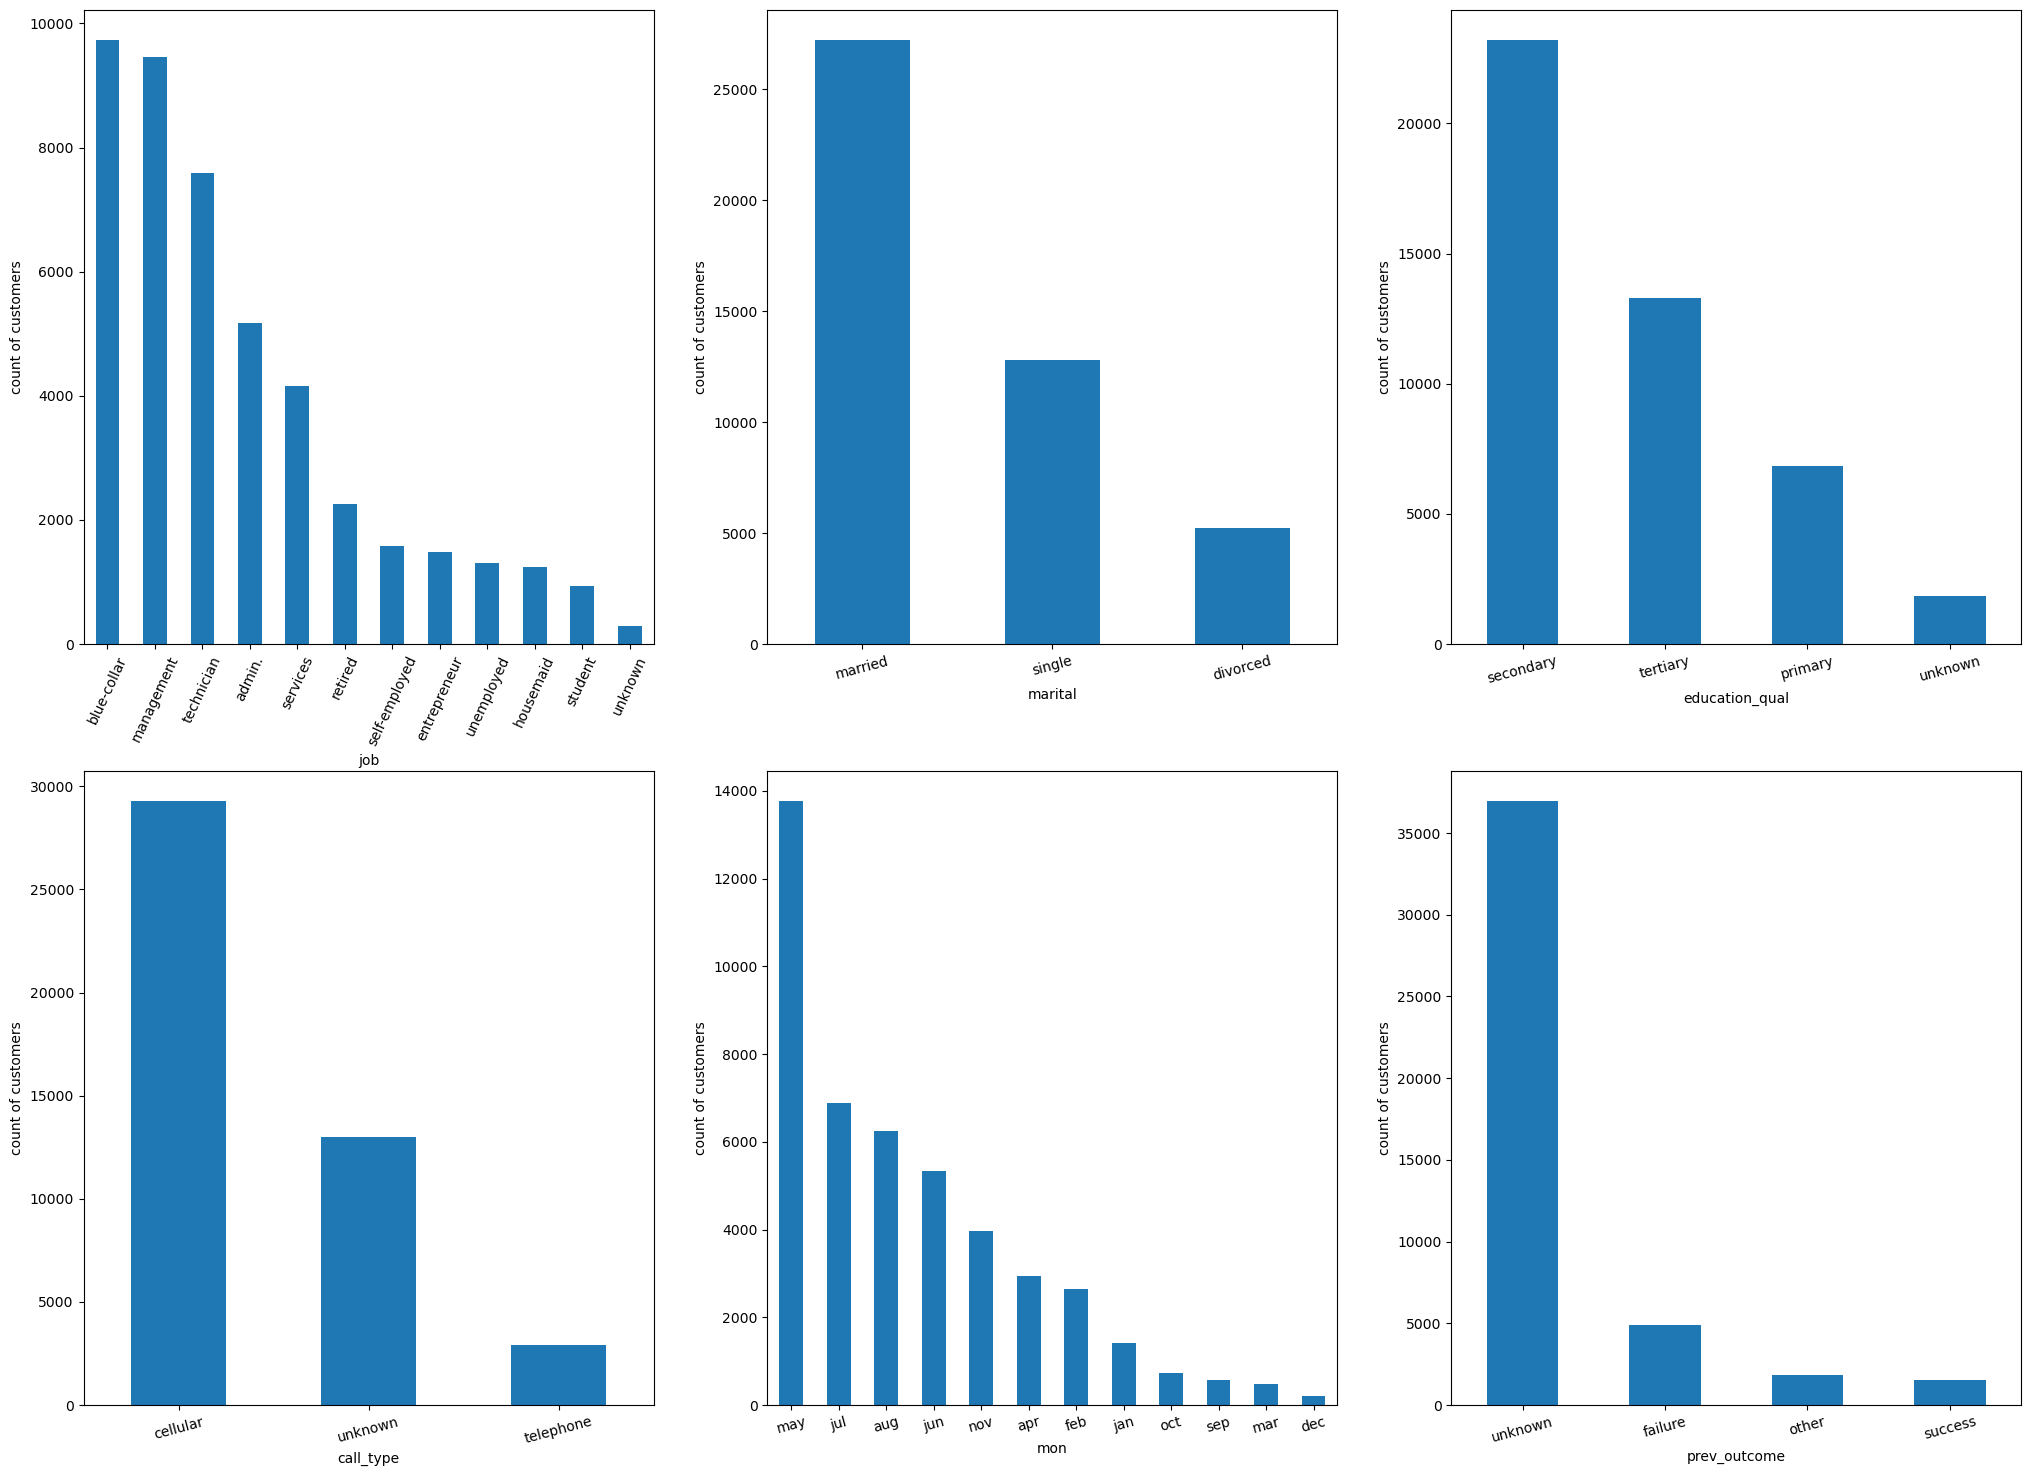

<Figure size 640x480 with 0 Axes>

In [25]:

plt.figure(figsize=(25,28))

plt.subplot(331)
df['job'].value_counts().plot(kind='bar')
plt.xticks(rotation=65)
plt.xlabel('job')
plt.ylabel('count of customers')

plt.subplot(332)
df['marital'].value_counts().plot(kind='bar')
plt.xticks(rotation=15)
plt.xlabel('marital')
plt.ylabel('count of customers')

plt.subplot(333)
df['education_qual'].value_counts().plot(kind='bar')
plt.xticks(rotation=15)
plt.xlabel('education_qual')
plt.ylabel('count of customers')

plt.subplot(334)
df['call_type'].value_counts().plot(kind='bar')
plt.xticks(rotation=15)
plt.xlabel('call_type')
plt.ylabel('count of customers')

plt.subplot(335)
df['mon'].value_counts().plot(kind='bar')
plt.xticks(rotation=15)
plt.xlabel('mon')
plt.ylabel('count of customers')

plt.subplot(336)
df['prev_outcome'].value_counts().plot(kind='bar')
plt.xticks(rotation=15)
plt.xlabel('prev_outcome')
plt.ylabel('count of customers')

plt.show()
plt.tight_layout()


## From the above plots we can clearly tell the following interpretation

### 1. Job

 - Most Target : blue-collar
 - Least Target : student
 
### 2. Marital

 - Most Target : married
 - Least Target : divorced
 
### 3. Education-qualification

 - Most Target : secondary
 - Least Target : primary
 
### 4. Call_type

 - Most Target : cellular
 - Least Target : telephone
 
### 5. Month

 - Most Target : may
 - Least Target : december
 
### 6. Previous-outcome

 - Most Target : unknown
 - Least Target : success
 
 

In [26]:

# let's check the percent of unknown category present in the columns

job_unknown = round((len(df[df['job']=='unknown']) / len(df)) * 100,1)
print(f'The percent of unknown in job is            ---> {job_unknown}\n')

education_qual_unknown = round((len(df[df['education_qual']=='unknown']) / len(df)) * 100,1)
print(f'The percent of unknown in education_qual is ---> {education_qual_unknown}\n')

call_type_unknown = round((len(df[df['call_type']=='unknown']) / len(df)) * 100,1)
print(f'The percent of unknown in call_type job is  ---> {call_type_unknown}')


The percent of unknown in job is            ---> 0.6

The percent of unknown in education_qual is ---> 4.1

The percent of unknown in call_type job is  ---> 28.8


In [27]:

# here in the column job and education_qual the percent of unknown is low so we can change it by using mode

df.loc[df['job'] == 'unknown', 'job'] = df['job'].mode()[0]
df.loc[df['education_qual'] == 'unknown','education_qual'] =df['education_qual'].mode()[0]

## Distribution Of Numerical Features

In [28]:

num_var.columns

Index(['age', 'day', 'dur', 'num_calls'], dtype='object')

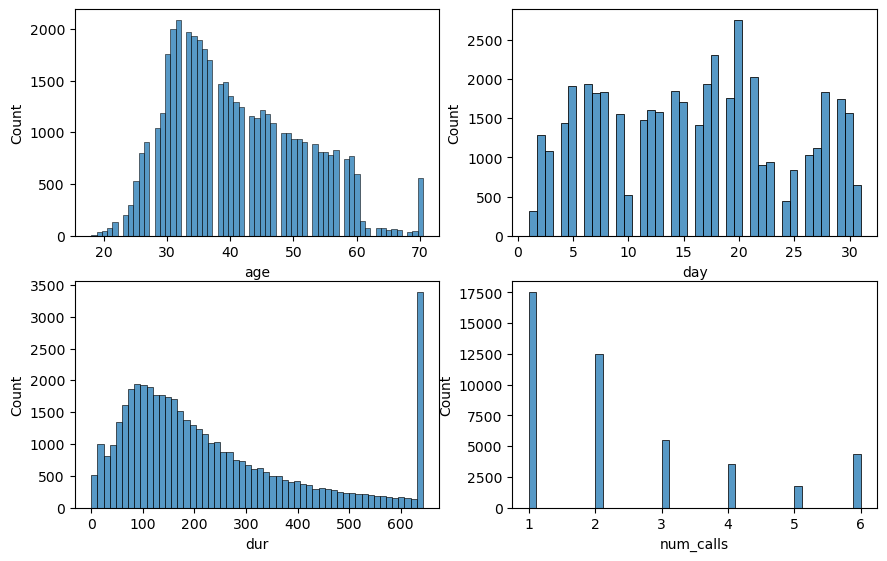

<Figure size 640x480 with 0 Axes>

In [29]:

plt.figure(figsize=(16,10))

plt.subplot(331)
sns.histplot(df['age'])

plt.subplot(332)
sns.histplot(df['day'])

plt.subplot(334)
sns.histplot(df['dur'])

plt.subplot(335)
sns.histplot(df['num_calls'])

plt.show()
plt.tight_layout()


## From the above plots we can clearly tell the following interpretation

### 1. Age

 - Most Target : 30 to 40 years
 - Least Target : belove 20 and above 60
 
### 2. Day

 - Most Target : mid of the month 
 - Least Target : beginning of the month
 
### 3. Duration

 - Most Target : around 30 mins
 - Least Target : around 100 to 200 seconds
 
### 4. Number-Of-Calls

 - Most Target : most people contacted 1 time
 - Least Target : contacted 5 times
 

## Distribution Of Categorical Features And Targets

In [30]:

cat_var.columns

Index(['job', 'marital', 'education_qual', 'call_type', 'mon', 'prev_outcome'], dtype='object')

In [31]:

job_order = df['job'].value_counts().index[::-1]
marital_order = df['marital'].value_counts().index[::-1]
education_qual_order = df['education_qual'].value_counts().index[::-1]
call_type_order = df['call_type'].value_counts().index[::-1]
mon_order = df['mon'].value_counts().index[::-1]
prev_outcome_order = df['prev_outcome'].value_counts().index[::-1]

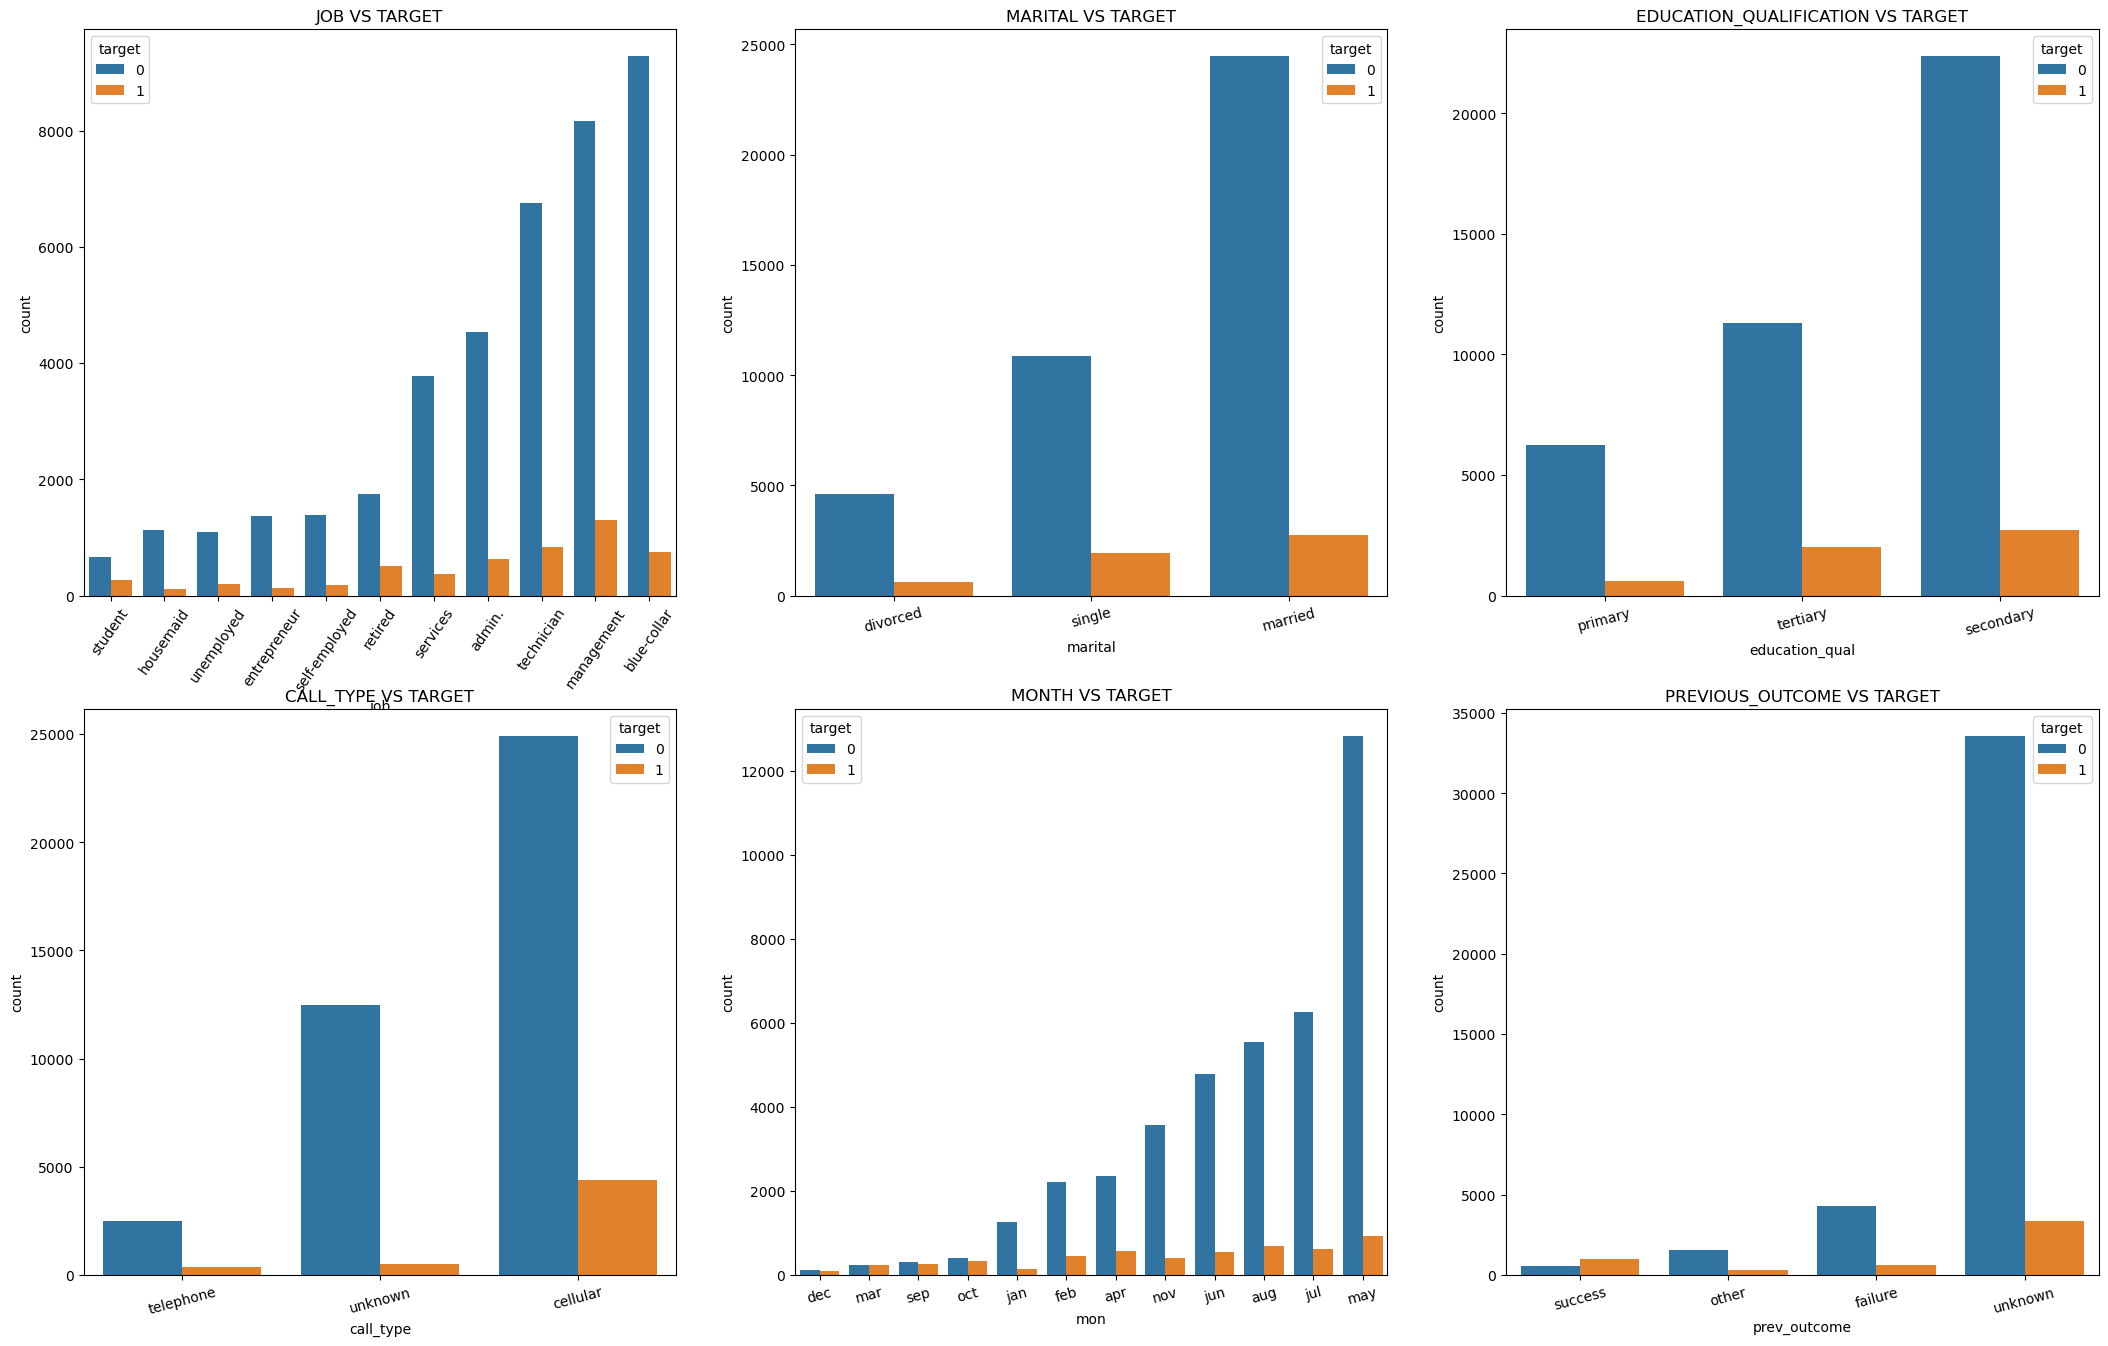

<Figure size 640x480 with 0 Axes>

In [32]:

plt.figure(figsize=(26,25))

plt.subplot(331)
sns.countplot(x='job', hue='target', data=df, order=job_order)
plt.xticks(rotation=55)
plt.title('JOB VS TARGET')

plt.subplot(332)
sns.countplot(x='marital', hue='target', data=df, order=marital_order)
plt.xticks(rotation=15)
plt.title('MARITAL VS TARGET')

plt.subplot(333)
sns.countplot(x='education_qual', hue='target', data=df, order=education_qual_order)
plt.xticks(rotation=15)
plt.title('EDUCATION_QUALIFICATION VS TARGET')

plt.subplot(334)
sns.countplot(x='call_type', hue='target', data=df, order=call_type_order)
plt.xticks(rotation=15)
plt.title('CALL_TYPE VS TARGET')

plt.subplot(335)
sns.countplot(x='mon', hue='target', data=df, order=mon_order)
plt.xticks(rotation=15)
plt.title('MONTH VS TARGET')

plt.subplot(336)
sns.countplot(x='prev_outcome', hue='target', data=df, order=prev_outcome_order)
plt.xticks(rotation=15)
plt.title('PREVIOUS_OUTCOME VS TARGET')

plt.show()
plt.tight_layout()


## From the above plots we can clearly tell the following interpretation

### 1. Job Vs Target

 - Target (No)    : Blue Collar
 - Suscribed (Yes): Management
 
### 2. Marital Vs Target

 - Target (No)    : married
 - Suscribed (Yes): married
 
### 3. Education-qualification Vs Target

 - Target (No)    : secondary
 - Suscribed (Yes): secondary
 
### 4. Call_type Vs Target

 - Target (No)    : cellular
 - Suscribed (Yes): cellular
 
### 5. Month Vs Target

 - Target (No)    : may
 - Suscribed (Yes): may
 
### 6. Previous-outcome Vs Target

 - Target (No)    : unknown
 - Suscribed (Yes): unknown
 

## Distribution Of Numerical Features And Target

In [33]:

num_var.columns

Index(['age', 'day', 'dur', 'num_calls'], dtype='object')

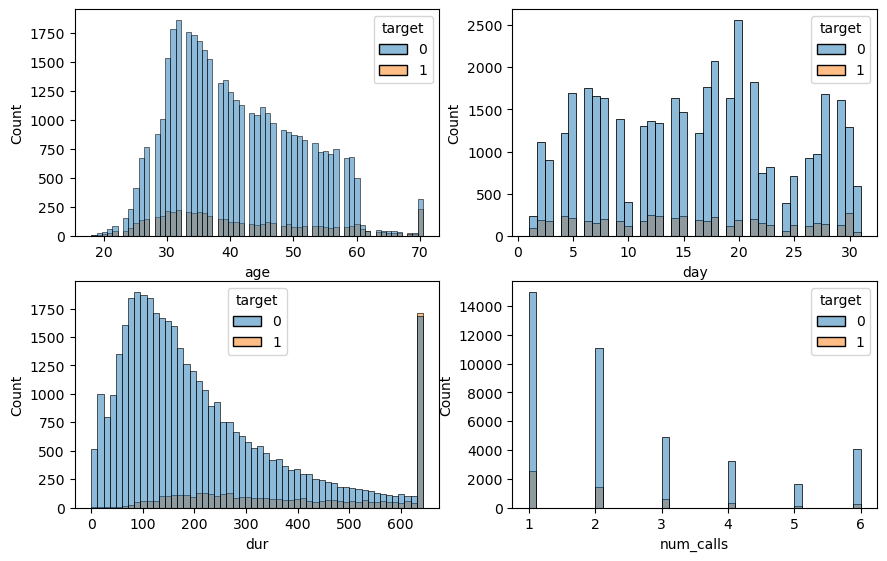

<Figure size 640x480 with 0 Axes>

In [34]:

plt.figure(figsize=(16,10))

plt.subplot(331)
sns.histplot(x='age', hue='target', data=df)

plt.subplot(332)
sns.histplot(x='day', hue='target', data=df)

plt.subplot(334)
sns.histplot(x='dur', hue='target', data=df)

plt.subplot(335)
sns.histplot(x='num_calls', hue='target', data=df)

plt.show()
plt.tight_layout()


## From the above plots we can clearly tell the following interpretation

### 1. Age Vs Target

 - Target (No)    : middle-age people
 - Suscribed (Yes): middle-age people
 
### 2. Day Vs Target

 - Target (No)    : mid of the month
 - Suscribed (Yes): mid of the month
 
### 3. Number-Of-Calls Vs Target

 - Target (No)    : people who called only 1 time
 - Suscribed (Yes): people who called only 1 time
 

# Encoding

In [35]:

# We're doing label encoding because thers's an order

df['marital'] = df['marital'].map({'divorced':0,'single':1,'married':2})
df['education_qual'] = df['education_qual'].map({'primary':0,'tertiary':2,'secondary':3})
df['call_type'] = df['call_type'].map({'telephone':0,'unknown':1,'cellular':2})
df['mon'] = df['mon'].map({'dec':0,'mar':1,'sep':2,'oct':3,'jan':4,'feb':5,'apr':6,'nov':7,'jun':8,'aug':9,'jul':10,'may':11})

# Here i'm using onehot encoding because no order in this column

df = pd.get_dummies(df,columns =['prev_outcome','job'])

In [36]:

df.head()

,age,marital,education_qual,call_type,day,mon,dur,num_calls,target,prev_outcome_failure,prev_outcome_other,prev_outcome_success,prev_outcome_unknown,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,58.0,2,2,1,5,11,261,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1,44.0,1,3,1,5,11,151,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,33.0,2,3,1,5,11,76,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
3,47.0,2,3,1,5,11,92,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
4,33.0,1,3,1,5,11,198,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0


# Splitting for training and testing

In [37]:

from sklearn.model_selection import train_test_split

x = df.drop('target',axis = 1).values
y = df['target'].values

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)


## Balancing

In [38]:

from imblearn.combine import SMOTEENN              

smt = SMOTEENN(sampling_strategy='all')
x_train_smt, y_train_smt = smt.fit_resample(x_train, y_train)

In [39]:

print(len(x_train_smt))
print(len(y_train_smt))

54090
54090


# MODELS


## Logistic regression

In [40]:

warnings.filterwarnings(action='ignore',category=ConvergenceWarning)
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train_smt, y_train_smt)
y_pred = lr.predict_proba(x_test)
y_pred

array([[0.48231713, 0.51768287],
       [0.93190737, 0.06809263],
       [0.74436399, 0.25563601],
       ...,
       [0.07898959, 0.92101041],
       [0.96389459, 0.03610541],
       [0.03718264, 0.96281736]])

In [41]:

# cross value score for lr

from sklearn.model_selection import cross_val_score
lr_cv_score = cross_val_score(lr, x_train_smt, y_train_smt, cv=10).mean()
print("CV score for logistic regression model :",lr_cv_score)

CV score for logistic regression model : 0.8810870770937326


In [42]:

from sklearn.metrics import f1_score, roc_auc_score, accuracy_score

y_pred = lr.predict(x_test)
lr_acc_score = accuracy_score(y_test,y_pred)
print("Accuracy score for logistic regression model :",lr_acc_score)

Accuracy score for logistic regression model : 0.7558898351952218


In [43]:

# let's find the f1 score

y_pred_labels = (y_pred>0.5).astype(int)
lr_f1_score = f1_score(y_test, y_pred_labels)
print("F1 score for logistic regression model :",lr_f1_score)

F1 score for logistic regression model : 0.45760629147210613


In [44]:

# auroc score

lr_auroc_score = roc_auc_score(y_test, y_pred_labels)
print("AUROC score for logistic regression model :",lr_auroc_score)

AUROC score for logistic regression model : 0.7996617136216262


# KNN

In [45]:

# in this model it's mandatory to scale the data.

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

standardscalar = StandardScaler()
standardscalar.fit(x_train_smt)
x_train_scaled = standardscalar.transform(x_train_smt)
x_test_scaled = standardscalar.transform(x_test)

knn_values = np.arange(1,20,2)
knn_cross_value = []
for k in knn_values:
    knn_class = KNeighborsClassifier(n_neighbors=k)
    knn_class.fit(x_train_scaled, y_train_smt)
    knn_score = knn_class.score(x_train_scaled, y_train_smt)
    cv_score = cross_val_score(knn_class, x_train_scaled, y_train_smt,cv=10).mean()
    result = {
        'k_value':k,
        'train_score':knn_score,
        'cross_val_score':cv_score
    }
    knn_cross_value.append(result)
m1 = pd.DataFrame(knn_cross_value)   

In [46]:
m1

,k_value,train_score,cross_val_score
0,1,1.000000,0.973026
1,3,0.981845,0.959882
2,5,0.972121,0.951322
3,7,0.963616,0.945018
4,9,0.956961,0.940525
5,11,0.951562,0.935922
6,13,0.945831,0.932834
7,15,0.942577,0.930690
8,17,0.940174,0.927048
9,19,0.936606,0.924958


In [47]:

best_row = m1.loc[m1['cross_val_score'].idxmax()]
knn_cv_score = best_row['cross_val_score']
print("Best K value is :",int(best_row['k_value']),"      Corresponding cross value score is :",knn_cv_score)

Best K value is : 1       Corresponding cross value score is : 0.9730264374191163


In [48]:

# accuracy score for knn model

y_pred = knn_class.predict(x_test_scaled)
knn_acc_score = accuracy_score(y_test,y_pred)
print("Accuracy score for KNN classification model :",knn_acc_score)

Accuracy score for KNN classification model : 0.8314345758212587


In [49]:

# f1 score for knn model

y_pred = knn_class.predict(x_test_scaled)
knn_f1_score = f1_score(y_test, y_pred)
print("F1 score for KNN classification model :",knn_f1_score)

F1 score for KNN classification model : 0.519242902208202


In [50]:

# auroc score for knn model

y_pred = knn_class.predict(x_test_scaled)
knn_auroc_score = roc_auc_score(y_test, y_pred)
print("AUROC score for KNN classification model :",knn_auroc_score)

AUROC score for KNN classification model : 0.7996551157350335


# Decision Tree

In [51]:

from sklearn.tree import DecisionTreeClassifier

dt_cross_value = []
for depth in range(1,30):
    dt_class = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_class.fit(x_train_smt, y_train_smt)
    dt_score = dt_class.score(x_train_smt, y_train_smt)
    cv_score = cross_val_score(dt_class, x_train_smt, y_train_smt, cv=10).mean()
    result = {'depth':depth,
             'train_score':dt_score,
             'cross_value_score':cv_score}
    dt_cross_value.append(result)
m2 = pd.DataFrame(dt_cross_value)

In [52]:
m2

,depth,train_score,cross_value_score
0,1,0.788593,0.787909
1,2,0.826345,0.825199
2,3,0.861287,0.861435
3,4,0.902108,0.901109
4,5,0.914032,0.909004
5,6,0.926511,0.924589
6,7,0.935385,0.928693
7,8,0.946700,0.935977
8,9,0.954335,0.943465
9,10,0.961065,0.944223


In [53]:

best_row = m2.loc[m2['cross_value_score'].idxmax()]
dt_cv_score = best_row['cross_value_score']
print("Best depth value is :",int(best_row['depth']),"      Corresponding cross value score is :",dt_cv_score)

Best depth value is : 16       Corresponding cross value score is : 0.955056387502311


In [54]:

# accuracy score for DT

y_pred = dt_class.predict(x_test)
dt_acc_score = accuracy_score(y_test,y_pred)
print("Accuracy score for DT classification model :",dt_acc_score)

Accuracy score for DT classification model : 0.8527817719278841


In [55]:

# f1 score for DT

y_pred = dt_class.predict(x_test)
dt_f1_score = f1_score(y_test, y_pred)
print("F1 score for DT classification model :",dt_f1_score)

F1 score for DT classification model : 0.5477404009514101


In [56]:

# auroc score for DT model

y_pred = dt_class.predict(x_test)
dt_auroc_score = roc_auc_score(y_test, y_pred)
print("AUROC score for DT classification model :",dt_auroc_score)

AUROC score for DT classification model : 0.805027473831277


# Random Forest

In [57]:

from sklearn.ensemble import RandomForestClassifier

rf_cross_value = []
for depth in range(1,20,2):
    rf_class = RandomForestClassifier(max_depth=depth,random_state=42)
    rf_class.fit(x_train_smt, y_train_smt)
    rf_score = rf_class.score(x_train_smt, y_train_smt)
    cv_score = cross_val_score(rf_class, x_train_smt, y_train_smt, cv=10).mean()
    result = {'depth':depth,
             'train_score':rf_score,
             'cross_value_score':cv_score}
    rf_cross_value.append(result)
m3 = pd.DataFrame(rf_cross_value)

In [58]:
m3

,depth,train_score,cross_value_score
0,1,0.828453,0.824589
1,3,0.922518,0.919227
2,5,0.943927,0.939305
3,7,0.955463,0.950305
4,9,0.964226,0.955722
5,11,0.972657,0.959752
6,13,0.979922,0.962082
7,15,0.987650,0.962451
8,17,0.993455,0.963117
9,19,0.996968,0.963894


In [59]:

best_row = m3.loc[m3['cross_value_score'].idxmax()]
rf_cv_score = best_row['cross_value_score']
print('Best depth value is :',int(best_row['depth']),'      Corresponding cross value score is :',rf_cv_score)

Best depth value is : 19       Corresponding cross value score is : 0.9638935108153077


In [64]:

# accuracy score for RF

y_pred = rf_class.predict(x_test)
rf_acc_score = accuracy_score(y_test, y_pred)
print("Accuracy score for RF classification model :",rf_acc_score)

Accuracy score for RF classification model : 0.8708107510231169


In [61]:

# f1 score for RF

y_pred = rf_class.predict(x_test)
rf_f1_score = f1_score(y_test, y_pred)
print("F1 score for RF classification model :",rf_f1_score)

F1 score for RF classification model : 0.5774240231548481


In [62]:

# auroc score for RF model

y_pred = rf_class.predict(x_test)
rf_auroc_score = roc_auc_score(y_test, y_pred)
print("AUROC score for RF classification model :",rf_auroc_score)

AUROC score for RF classification model : 0.8120921898385601


# XGBoost

In [65]:

import xgboost as xgb

value = []
for i in range(21):
    dec_val = i*0.05
    if dec_val <= 1.0:
        for_dec_val = '{:.2f}'.format(dec_val)
        value.append(float(for_dec_val))
xgboost_cross_value = []
for lr_rate in value:
    xgb_class = xgb.XGBClassifier(learning_rate = lr_rate, n_estimators=100)
    xgb_class.fit(x_train_smt, y_train_smt)
    xgb_score = xgb_class.score(x_train_smt, y_train_smt)
    cv_score = cross_val_score(xgb_class, x_train_smt, y_train_smt, cv=10).mean()
    result = {
        'learning_rate':lr_rate,
        'train score':xgb_score,
        'cross_value_score':cv_score
    }
    xgboost_cross_value.append(result)
m4 = pd.DataFrame(xgboost_cross_value)

In [66]:
m4

,learning_rate,train score,cross_value_score
0,0.00,0.566778,0.566778
1,0.05,0.970882,0.960899
2,0.10,0.977574,0.964411
3,0.15,0.980773,0.965280
4,0.20,0.983527,0.965872
5,0.25,0.985912,0.965631
6,0.30,0.988149,0.965373
7,0.35,0.990516,0.965594
8,0.40,0.991607,0.965631
9,0.45,0.993049,0.965779


In [67]:

best_row = m4.loc[m4['cross_value_score'].idxmax()]
xgb_cv_score = best_row['cross_value_score']
print('Best Learning Rate is :',float(best_row['learning_rate']),'      Corresponding cross value score is :',xgb_cv_score)

Best Learning Rate is : 0.2       Corresponding cross value score is : 0.9658716953226104


In [68]:

# accuracy score for XGB

y_pred = xgb_class.predict(x_test)
xgb_acc_score = accuracy_score(y_test, y_pred)
print("Accuracy score for XGB classification model :",xgb_acc_score)

Accuracy score for XGB classification model : 0.8762305054750581


In [69]:

# f1 score for XGB

y_pred = xgb_class.predict(x_test)
xgb_f1_score = f1_score(y_test, y_pred)
print("F1 score for XGB classification model :",xgb_f1_score)

F1 score for XGB classification model : 0.5970471732084983


In [70]:

# auroc score for RF model

y_pred = xgb_class.predict(x_test)
xgb_auroc_score = roc_auc_score(y_test, y_pred)
print("AUROC score for XGB classification model :",xgb_auroc_score)

AUROC score for XGB classification model : 0.8274961136132921


In [71]:


# Cross Value Score For All Models

print('Cross Value Score For Logistic Regression model      :',lr_cv_score)
print('Cross Value Score For KNN Classification model       :',knn_cv_score)
print('Cross Value Score For DT Classification model        :',dt_cv_score)
print('Cross Value Score For RF Classification model        :',rf_cv_score)
print('Cross Value Score For XGBOOST Classification model   :',xgb_cv_score)

Cross Value Score For Logistic Regression model      : 0.8810870770937326
Cross Value Score For KNN Classification model       : 0.9730264374191163
Cross Value Score For DT Classification model        : 0.955056387502311
Cross Value Score For RF Classification model        : 0.9638935108153077
Cross Value Score For XGBOOST Classification model   : 0.9658716953226104


# EVALUATION METRICS


## ACCURACY score

In [72]:

# Accuracy score for all models

print("Accuracy score for logistic regression model      :",lr_acc_score)
print("Accuracy score for KNN Classification model       :",knn_acc_score)
print("Accuracy score for DT Classification model        :",dt_acc_score)
print('Accuracy Score For RF Classification model        :',rf_acc_score)
print('Accuracy Score For XGBOOST Classification model   :',xgb_acc_score)

Accuracy score for logistic regression model      : 0.7558898351952218
Accuracy score for KNN Classification model       : 0.8314345758212587
Accuracy score for DT Classification model        : 0.8527817719278841
Accuracy Score For RF Classification model        : 0.8708107510231169
Accuracy Score For XGBOOST Classification model   : 0.8762305054750581


## F1 SCORE

In [73]:

# F1 score for all models

print("F1 score for logistic regression model      :",lr_f1_score)
print("F1 score for KNN Classification model       :",knn_f1_score)
print("F1 score for DT Classification model        :",dt_f1_score)
print('F1 Score For RF Classification model        :',rf_f1_score)
print('F1 Score For XGBOOST Classification model   :',xgb_f1_score)

F1 score for logistic regression model      : 0.45760629147210613
F1 score for KNN Classification model       : 0.519242902208202
F1 score for DT Classification model        : 0.5477404009514101
F1 Score For RF Classification model        : 0.5774240231548481
F1 Score For XGBOOST Classification model   : 0.5970471732084983


## AUROC score

In [74]:

# auroc score for all models

print("AUROC score for logistic regression model      :",lr_auroc_score)
print("AUROC score for KNN Classification model       :",knn_auroc_score)
print("AUROC score for DT Classification model        :",dt_auroc_score)
print('AUROC Score For RF Classification model        :',rf_auroc_score)
print('AUROC Score For XGBOOST Classification model   :',xgb_auroc_score)

AUROC score for logistic regression model      : 0.7996617136216262
AUROC score for KNN Classification model       : 0.7996551157350335
AUROC score for DT Classification model        : 0.805027473831277
AUROC Score For RF Classification model        : 0.8120921898385601
AUROC Score For XGBOOST Classification model   : 0.8274961136132921



### From the above Evaluation metrics used in these models, XGBoost classification model gives good score of around 0.83

#### now let's plot the feature importance for this model

# Feature Importance

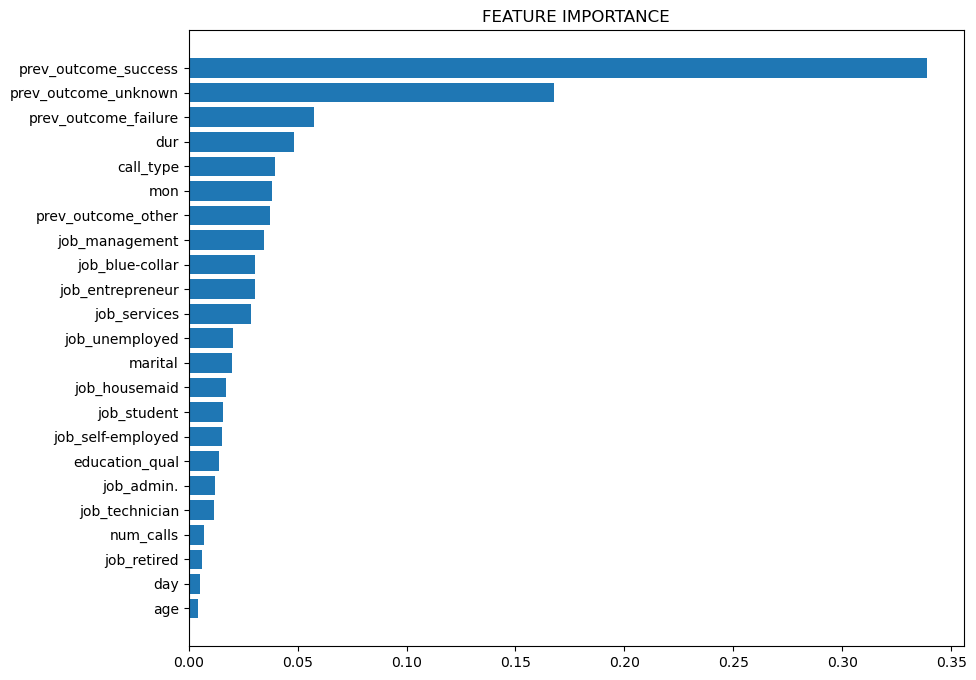

In [75]:

# Get the feature importances and their corresponding indices
importances = xgb_class.feature_importances_
indices = importances.argsort()

# Get the names of columns, excluding 'target'
columns_without_target = [col for col in df.columns if col != 'target']

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 8))
plt.barh([columns_without_target[i] for i in indices], importances[indices])
plt.title('FEATURE IMPORTANCE')
plt.show()


## Conclusion

In this project we have analysed the given dataset and used various machine learning models for prediction.

The problem statement given is Supervised Learning and of type Binary classification.

We have Evaluated our models with AUROC_Score and Xgboost classification model was found to give highest score of 0.85.

The client should focused on the top few features of order given below to have them subscribed to the insurance.

- Previous-outcome : where success is the least in previous-outcome but most subscribed are from success.
- Duration : Longer the call better influncing the clients.
- Call-type : this is not that important to get the client subscribed.
- Job : In this blue collar people are targeted more but people who subscribed more are from management job.
- Month : In the month of may people subscribed to insurance are more.
